In [2]:
%matplotlib inline

import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

import matplotlib.image as mpimg
from skimage.io import imread, imshow

#Import Tensorflow namespaces
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [3]:
# Import the dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
# Split into features and targets

train_labels = df_train.label.values
test_labels = df_test.label.values

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

X_train = df_train.drop('label',axis=1).values
X_test  = df_test.drop('label',axis=1).values

print(y_train)


[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [6]:
# Principle Component Analysis
number_of_components = 50
from sklearn.decomposition import PCA


pca_model = PCA(n_components=number_of_components, svd_solver='full')
pca_model.fit(X_train)


X_train_pca = pca_model.transform(X_train)
X_test_pca = pca_model.transform(X_test)

# Normalization

X_train_pca = X_train_pca / X_train_pca.max()
X_test_pca = X_test_pca / X_test_pca.max()


In [7]:
# Neural network initialization

activation = 'relu'
dropout_rate = 0.2
kernel_initializer ='uniform'
optimizer = 'adam'
lr = 0.01
batchsize = 32

model = Sequential()
model.add(Dense(50, input_dim=number_of_components, kernel_initializer=kernel_initializer,activation=activation))
model.add(Dropout(dropout_rate))
model.add(Dense(50, kernel_initializer=kernel_initializer,activation=activation))
model.add(Dropout(dropout_rate))
model.add(Dense(10,activation = 'softmax'))


model.compile(loss="categorical_crossentropy", optimizer=optimizer,metrics=['accuracy']) 

In [9]:
history = model.fit(X_train_pca, y_train, epochs=10,validation_split=0.33, batch_size=batchsize,verbose=1)

Epoch 1/10
629/629 [==============================] - 1s 987us/step - loss: 0.2361 - accuracy: 0.9280 - val_loss: 0.1928 - val_accuracy: 0.9417
Epoch 2/10
629/629 [==============================] - 1s 977us/step - loss: 0.2306 - accuracy: 0.9303 - val_loss: 0.1842 - val_accuracy: 0.9450
Epoch 3/10
629/629 [==============================] - 1s 973us/step - loss: 0.2188 - accuracy: 0.9340 - val_loss: 0.1828 - val_accuracy: 0.9450
Epoch 4/10
629/629 [==============================] - 1s 948us/step - loss: 0.2203 - accuracy: 0.9335 - val_loss: 0.1794 - val_accuracy: 0.9475
Epoch 5/10
629/629 [==============================] - 1s 969us/step - loss: 0.2139 - accuracy: 0.9355 - val_loss: 0.1725 - val_accuracy: 0.9491
Epoch 6/10
629/629 [==============================] - 1s 959us/step - loss: 0.2015 - accuracy: 0.9390 - val_loss: 0.1668 - val_accuracy: 0.9506
Epoch 7/10
629/629 [==============================] - 1s 968us/step - loss: 0.2004 - accuracy: 0.9381 - val_loss: 0.1652 - val_accuracy:

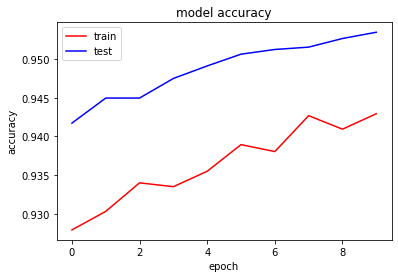

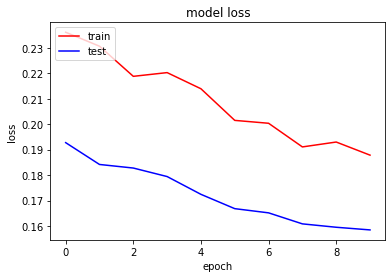

In [10]:
# Plot history

# Accuray 
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss 
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
y_predicted = model.predict_classes(X_test_pca,batch_size=1, verbose=1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
12000/12000 [==============================] - 3s 261us/step


In [12]:
print(y_predicted)

[3 8 0 ... 7 6 9]


In [13]:
print(y_predicted)
print(print(accuracy_score(test_labels, y_predicted)))

[3 8 0 ... 7 6 9]
0.9556666666666667
None


In [14]:
# Confusion matrix

print(classification_report(test_labels, y_predicted))

cf = confusion_matrix(test_labels, y_predicted)

print(cf)
print(accuracy_score(test_labels, y_predicted) * 100) 



              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1195
           1       0.97      0.98      0.98      1352
           2       0.96      0.96      0.96      1157
           3       0.95      0.94      0.95      1258
           4       0.94      0.96      0.95      1140
           5       0.95      0.93      0.94      1076
           6       0.96      0.97      0.97      1167
           7       0.96      0.97      0.96      1268
           8       0.94      0.94      0.94      1174
           9       0.95      0.92      0.93      1213

    accuracy                           0.96     12000
   macro avg       0.96      0.96      0.96     12000
weighted avg       0.96      0.96      0.96     12000

[[1174    0    4    0    0    1    8    1    7    0]
 [   0 1326    3    5    2    0    0    5   10    1]
 [   8    0 1105    5    8    2    6    9   11    3]
 [   0    3   14 1184    0   21    3   11   16    6]
 [   0    8    2    0 1092   

# Grid search and hyperparameter tuning

In [15]:
def create_model(optimizer='adam',activation = 'relu',dropout_rate = 0.0, kernel_initializer='uniform',neurons = 10):
    model = Sequential()
    model.add(Dense(neurons, input_dim=number_of_components, kernel_initializer=kernel_initializer,activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, kernel_initializer=kernel_initializer,activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10,activation = 'softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy']) 
    return model

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=create_model,batch_size=batchsize, epochs =10)

activation =  ['relu', 'tanh', 'sigmoid'] 
#learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
dropout_rate = [0.0, 0.1, 0.5]
#weight_constraint=[1, 2, 3, 4, 5]
neurons = [5, 10, 20, 30, 40 ,50]
init = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
optimizer = [ 'SGD', 'Adam']
#optimizer = [ 'SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

epochs = [50] 
batch_size = [16, 32] 
param_grid = dict(epochs=epochs, batch_size=batch_size,optimizer = optimizer, dropout_rate = dropout_rate,activation = activation)
##############################################################
grid = GridSearchCV(estimator=model, param_grid = param_grid,verbose=3)
grid_result = grid.fit(X_train_pca, y_train) 


In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))